Importing The Packages:

In [246]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [247]:
import pandas as pd
import numpy as np

Reading the given dataset:

In [248]:
df = pd.read_csv("data.csv", encoding='cp1252')

In [249]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [250]:
df.head() #visualizing 1st 5 row value

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [251]:
df.info() # checking the data types of all given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [252]:
df.isnull().sum() # checking the null values in the given data set

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Data Cleaning Process:

In [253]:
df = df.dropna(subset= ["Description"]) # Dropping all null values in description column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [254]:
df2 = df.loc[:, ['Description']]
df2

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [255]:
#Removing punctuation and numerical values
df['Description_processed'] = df['Description'].str.replace("[^a-zA-z]", " ")
df['Description_processed']

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
541904            PACK OF    SPACEBOY NAPKINS
541905           CHILDREN S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET   PIECE RETROSPOT 
Name: Description_processed, Length: 540455, dtype: object

In [256]:
df['Description_processed'].head()

0     WHITE HANGING HEART T LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART 
Name: Description_processed, dtype: object

In [257]:
df['Description_processed'] = df['Description_processed'].astype(str) # coverting into string

In [258]:
df['Description_processed'] = df['Description_processed'].apply(lambda row:' '.join([word for word in row.split() if len(word)>2]))
df['Description_processed']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905              CHILDREN APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Description_processed, Length: 540455, dtype: object

In [259]:
df['Description_processed'] = [lowercasewords.lower() for lowercasewords in df['Description_processed']] # converting all words into lower case
df['Description_processed']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
541904                  pack spaceboy napkins
541905              children apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Description_processed, Length: 540455, dtype: object

Removing Stopwords:

In [260]:
#importing all required package for removing stop words
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [261]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'that', 'why', 'their', 'll', 'then', 'mustn', 'what', 'here', 'above', 'there', 'can', 'you', 'we', 'ourselves', 'won', 'but', "shan't", 'be', 'hadn', 're', "haven't", 'doing', 'your', 'up', 'shan', "you're", 'at', 'before', 'other', 'and', 'both', 'i', 'not', 'ours', "won't", 'under', 'mightn', 'yours', 've', 'with', 'further', "aren't", "hadn't", 'shouldn', 'when', 'had', 'hers', 'any', 'aren', 'very', "doesn't", 'or', 'did', 'them', 'do', "mustn't", 'y', 'such', 'her', 'am', 'didn', 'it', 's', 'yourself', 'once', 'my', 'our', 'yourselves', 'off', 'own', 'these', 'in', 'been', 'by', 'about', 'into', 'most', 'o', 'again', 'for', 'if', 'more', 'wasn', 'will', "don't", 'they', 'theirs', "isn't", 'weren', 'his', 'its', 'm', 'against', 'during', 'the', "she's", 'through', 'as', 'same', 'after', 'hasn', 'over', 'to', 'needn', 'of', 'on', 'having', "mightn't", 'an', "wouldn't", 'he', 'him', 'out', 'few', 'where', 'while', 'herself', 'below', 'don', 'is', 'how', "didn't", 'isn', 'each', 'h

In [262]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words("english")
list_words = []
stop_words.extend(list_words)
def removed_stopwords(stwords):
  word_tokenized = word_tokenize(stwords)
  words_updated = " ".join([a for a in word_tokenized if a not in stop_words])
  return words_updated

df['Description_processed'] = [removed_stopwords(r) for r in df['Description_processed']]


POS tag and Lemmatization

In [263]:
#importing all packages for POS and lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer() #initializing the function lemmatization
def word_tags(lem_tag):
  if lem_tag.startswith('J'):
    return wordnet.ADJ
  elif lem_tag.startswith('V'):
    return wordnet.VERB
  elif lem_tag.startswith('N'):
    return wordnet.NOUN
  elif lem_tag.startswith("R"):
    return wordnet.ADV
  else:
    return None

def lem_sentance(sent):
  sent_tag = nltk.pos_tag(nltk.word_tokenize(sent))
  word_tagged = map(lambda x: (x[0], word_tags(x[1])), sent_tag)
  lemmetized_sent = []
  for word, tag in word_tagged:
    if tag is None:
      lemmetized_sent.append(word)
    else:
      lemmetized_sent.append(lemmatizer.lemmatize(word,tag))

  return " ".join(lemmetized_sent)

df['Description_processed'] = df['Description_processed'].apply(lambda x: lem_sentance(x))


In [264]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade


In [265]:
df["Description_processed"]

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Description_processed, Length: 540455, dtype: object

In [266]:
df1 = df["Description_processed"].drop_duplicates() #dropping the duplicates in the description processed data
df1 = pd.DataFrame(df1)
df1

,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart light holder


Plotting:

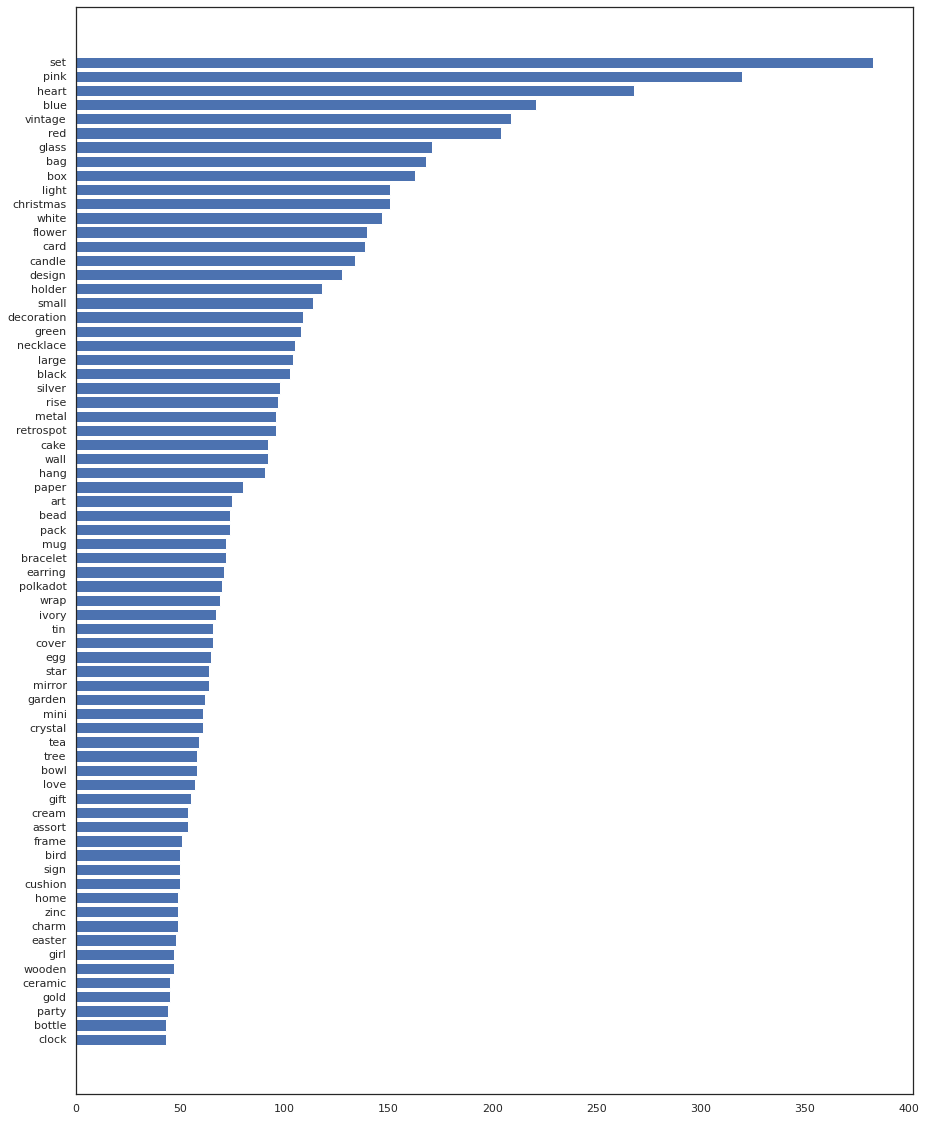

In [267]:
#importing the required package for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import FreqDist 
sns.set(style = 'white')

plt_words = " ".join([text for text in df1['Description_processed']])
plt_words = plt_words.split()
df_words = FreqDist(plt_words)

df_words = pd.DataFrame({'word': list(df_words.keys()), 'count': list(df_words.values())})
df_words

df_words = df_words.nlargest(columns='count', n = 70)
df_words.sort_values('count', inplace = True)

plt.figure(figsize=(15,20))
c = plt.barh(df_words['word'], width = df_words['count']) 
plt.show()

From the above plot we know what are all the words are used most frequently

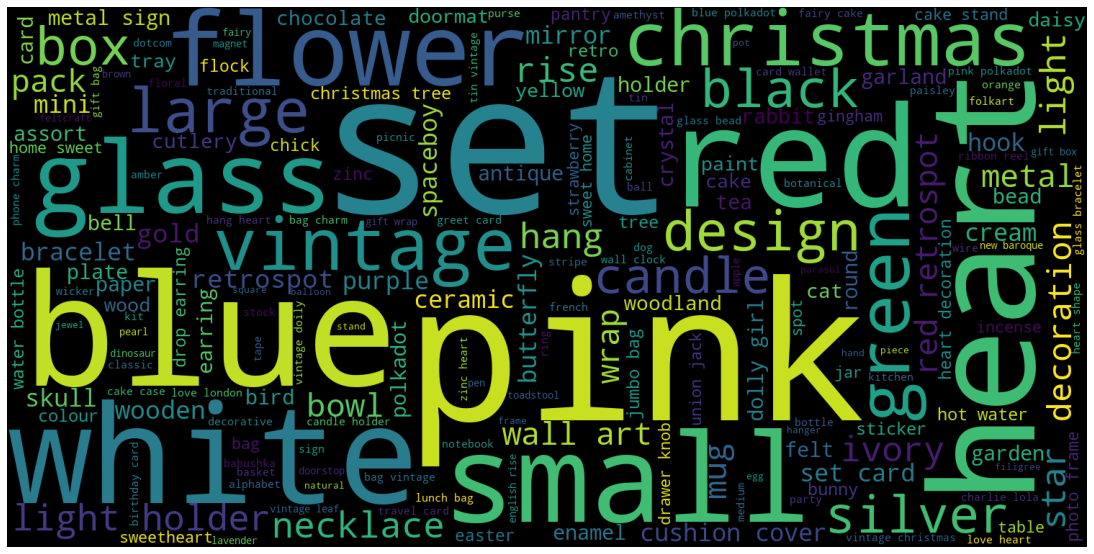

In [268]:

from wordcloud import WordCloud

plt_words = ' '.join([text for text in df1['Description_processed']])
wordcloud = WordCloud(width=1500, height= 750,
                      background_color= 'black',
                      ).generate(plt_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


The above wordcloud image show us which word is used frequently by increased size of words

Frequency approch:

In [269]:
from sklearn.feature_extraction.text import CountVectorizer

In [270]:
vectorizer = CountVectorizer(binary= False)
bag_of_words = vectorizer.fit_transform(df1['Description_processed'])

col_name = vectorizer.get_feature_names()
df2 = pd.DataFrame(bag_of_words.toarray(), columns= col_name)
df2

,abc,abstract,acapulco,account,acrylic,add,address,ade,adjust,adjustment,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
ar = bag_of_words.toarray() #bag of words model representing in array
ar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

ML-Algorith => K- Means:


In [272]:
from sklearn.cluster import KMeans #importing K-means model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

Text(0, 0.5, 'Sum of squared distance')

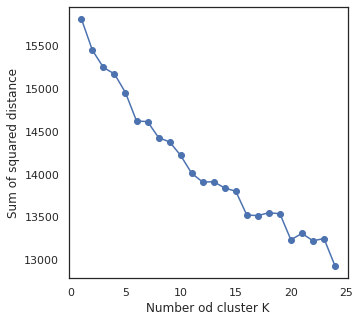

In [273]:
#elbow plot
K_list = list(range(1,25))
inertias = []
for k in K_list:
  kl= KMeans(n_clusters=k)
  kl.fit(ar)
  inertias.append(kl.inertia_)

plt.figure(figsize=(5,5))
plt.plot(K_list, inertias, '-o')
plt.xlabel('Number od cluster K')
plt.ylabel('Sum of squared distance')

In [274]:
scale = StandardScaler()
X_scaled = scale.fit_transform(ar)

In [275]:
from sklearn.decomposition import PCA
comp = None
pca = PCA(n_components= comp)
pca.fit(X_scaled)

PCA()

In [276]:
print(pca.explained_variance_ratio_ * 100)
print()

[2.67150857e-01 2.43850536e-01 2.10975508e-01 ... 9.62410260e-35
 4.06444424e-35 1.73193624e-36]



In [277]:
print(pca.explained_variance_ratio_.cumsum() * 100) #cummulative variance ratio
print()

[  0.26715086   0.51100139   0.7219769  ... 100.         100.
 100.        ]



In [278]:
print((pca.explained_variance_ratio_.cumsum() * 100)[:100])
print()

[ 0.26715086  0.51100139  0.7219769   0.90758228  1.09207285  1.27175625
  1.44792373  1.6187622   1.78879547  1.95716971  2.12401809  2.29007289
  2.45333452  2.61628801  2.77869833  2.94024231  3.10167205  3.26261052
  3.42345975  3.58379461  3.74409089  3.90367808  4.06263225  4.22068274
  4.37804587  4.53514239  4.69081499  4.84604546  5.00078015  5.15495995
  5.30868     5.46208292  5.6151986   5.76777566  5.91998017  6.07151087
  6.22271751  6.37342694  6.52303045  6.6721358   6.82119323  6.96921431
  7.11692928  7.26426901  7.41082552  7.5569468   7.70189146  7.84649829
  7.99087401  8.13495501  8.27867366  8.42184943  8.56432581  8.70660733
  8.84874198  8.99072547  9.13199437  9.27299349  9.41331127  9.5534116
  9.69328047  9.8325569   9.97159836 10.11017729 10.24841885 10.38627783
 10.52350231 10.66045784 10.79715172 10.93353505 11.06981346 11.20590726
 11.34129591 11.47643195 11.61086596 11.74501554 11.87874015 12.01233651
 12.14553155 12.27860421 12.4113282  12.5434492  12.

Text(0, 0.5, 'Varience in percentage')

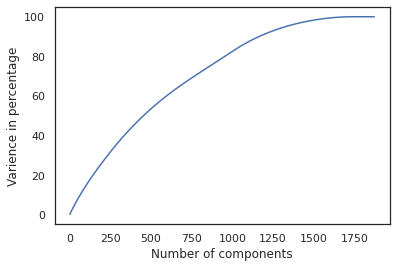

In [279]:
comp = len(pca.explained_variance_ratio_) \
    if comp is None else comp
plt.plot(range(1, comp+1),
         np.cumsum(pca.explained_variance_ratio_* 100))

plt.xlabel("Number of components")
plt.ylabel("Varience in percentage")


In [280]:
from sklearn.decomposition import PCA #importing Principal Component Analysis(PCA) model

No. of components: 953


Text(0, 0.5, 'Varience in percentage')

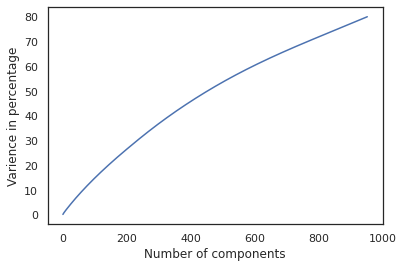

In [281]:
pca = PCA(n_components= 0.80)
pca.fit(X_scaled)
comp = len(pca.explained_variance_ratio_)
print(f"No. of components: {comp}")
plt.plot(range(1, comp+1),
         np.cumsum(pca.explained_variance_ratio_* 100))

plt.xlabel("Number of components")
plt.ylabel("Varience in percentage")

Frequency Approach:

In [282]:
from sklearn.decomposition import PCA
pca = PCA(953)
pca_new = pca.fit_transform(ar) 
pca_new.shape

(4020, 953)

Text(0, 0.5, 'Sum of squared distance')

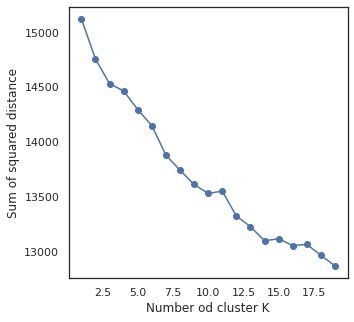

In [283]:
from sklearn.cluster import KMeans
K_list = list(range(1,20))
inertias = []
for k in K_list:
  kl= KMeans(n_clusters=k)
  kl.fit(pca_new)
  inertias.append(kl.inertia_)

plt.figure(figsize=(5,5))
plt.plot(K_list, inertias, '-o')
plt.xlabel('Number od cluster K')
plt.ylabel('Sum of squared distance')

From above graph we can asume there is 12 set of clusters

In [284]:
kl = KMeans(n_clusters = 12) #assuming K value as 12
kl.fit(pca_new)
cent = kl.cluster_centers_ #centroids

In [285]:
kl.labels_ #it shows which data belongs to which cluster

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [286]:
lab = kl.fit_predict(pca_new)
print(lab)

[11  1 11 ...  1 11  1]


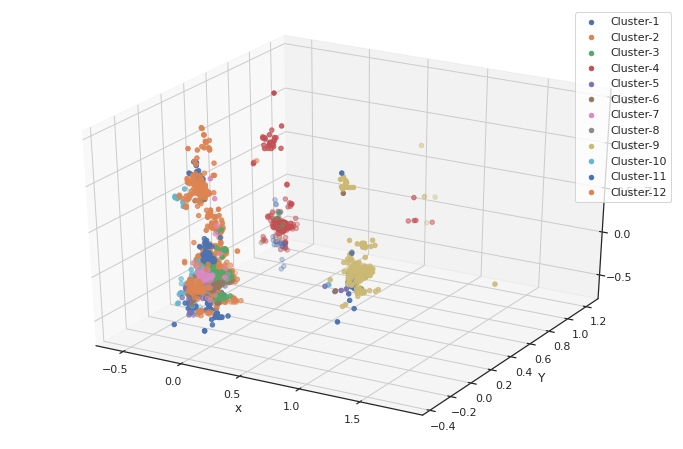

In [287]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

labels = np.unique(lab)

plot = plt.figure(figsize=(12,8))
subplt = plot.add_subplot(111, projection = '3d')

subplt.scatter(pca_new[lab == 0,0], pca_new[lab == 0,1], pca_new[lab == 0,2], s= 20, label = 'Cluster-1')
subplt.scatter(pca_new[lab == 1,0], pca_new[lab == 1,1], pca_new[lab == 1,2], s= 20, label = 'Cluster-2')
subplt.scatter(pca_new[lab == 2,0], pca_new[lab == 2,1], pca_new[lab == 2,2], s= 20, label = 'Cluster-3')
subplt.scatter(pca_new[lab == 3,0], pca_new[lab == 3,1], pca_new[lab == 3,2], s= 20, label = 'Cluster-4')
subplt.scatter(pca_new[lab == 4,0], pca_new[lab == 4,1], pca_new[lab == 4,2], s= 20, label = 'Cluster-5')
subplt.scatter(pca_new[lab == 5,0], pca_new[lab == 5,1], pca_new[lab == 5,2], s= 20, label = 'Cluster-6')
subplt.scatter(pca_new[lab == 6,0], pca_new[lab == 6,1], pca_new[lab == 6,2], s= 20, label = 'Cluster-7')
subplt.scatter(pca_new[lab == 7,0], pca_new[lab == 7,1], pca_new[lab == 7,2], s= 20, label = 'Cluster-8')
subplt.scatter(pca_new[lab == 8,0], pca_new[lab == 8,1], pca_new[lab == 8,2], s= 20, label = 'Cluster-9')
subplt.scatter(pca_new[lab == 9,0], pca_new[lab == 9,1], pca_new[lab == 9,2], s= 20, label = 'Cluster-10')
subplt.scatter(pca_new[lab == 10,0], pca_new[lab == 10,1], pca_new[lab == 10,2], s= 20, label = 'Cluster-11')
subplt.scatter(pca_new[lab == 11,0], pca_new[lab == 11,1], pca_new[lab == 11,2], s= 20, label = 'Cluster-12')

subplt.set_xlabel('x')
subplt.set_ylabel('Y')
subplt.set_zlabel('Z')
plt.legend()
plt.show()


From above 3D plot we just plotting the clusters

In [288]:
pca_new[lab == 0]

array([[-3.01929571e-02, -1.63196598e-01, -3.33811446e-01, ...,
         1.64607178e-03,  1.33521660e-03,  1.67011129e-03],
       [-3.42640808e-01,  8.53063982e-01, -4.46852395e-01, ...,
        -1.97752037e-05, -5.48309703e-03, -6.44842641e-04],
       [-6.51712319e-02, -1.09304691e-01, -2.86149428e-01, ...,
        -1.58678277e-02, -2.27609269e-02, -6.06636571e-03],
       ...,
       [-6.82590285e-02, -1.12236187e-01, -3.01199958e-01, ...,
         2.86766421e-03, -1.73619626e-03,  1.97001281e-03],
       [-7.04823294e-02, -1.09304780e-01, -3.08457820e-01, ...,
         3.52711753e-03, -9.78686454e-04,  4.37565425e-03],
       [ 6.03651686e-02, -3.11527276e-01, -4.99692413e-01, ...,
        -1.22851858e-03,  2.47461031e-03,  2.60635324e-03]])

In [289]:
df3 = pd.DataFrame(kl.labels_)
print(df3.shape)
df3

(4020, 1)


,0
0,11
1,1
2,11
3,1
4,11
...,...
4015,1
4016,5
4017,1
4018,11


In [290]:
print(df1.shape)
df1

(4020, 1)


,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
514649,wet
532724,wet box
535329,mixed
537621,cream hang heart light holder


In [291]:
df1 = df1.reset_index(drop= True)
df1

,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
4015,wet
4016,wet box
4017,mixed
4018,cream hang heart light holder


In [292]:
df4 = df1.join(df3)
print(df4.shape) #here we are joining the cluster to the given data set
df4

(4020, 2)


,Description_processed,0
0,white hang heart light holder,11
1,white metal lantern,1
2,cream cupid heart coat hanger,11
3,knit union flag hot water bottle,1
4,red woolly hottie white heart,11
...,...,...
4015,wet,1
4016,wet box,5
4017,mixed,1
4018,cream hang heart light holder,11


In [293]:
df4.rename(columns={0:'Product_Cluster'}, inplace = True) #we are giving the column name to the cluster
df4.head()

,Description_processed,Product_Cluster
0,white hang heart light holder,11
1,white metal lantern,1
2,cream cupid heart coat hanger,11
3,knit union flag hot water bottle,1
4,red woolly hottie white heart,11


In [294]:
df5 = pd.merge(df,df4, how='left', on = 'Description_processed') #here we are merging the clusters to the main data set
df5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed,Product_Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,11
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,11
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,11
...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,1
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,1
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,1
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,1


In [295]:
df6 = pd.get_dummies(df5,columns=["Product_Cluster"])
df6

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed,Product_Cluster_0,...,Product_Cluster_2,Product_Cluster_3,Product_Cluster_4,Product_Cluster_5,Product_Cluster_6,Product_Cluster_7,Product_Cluster_8,Product_Cluster_9,Product_Cluster_10,Product_Cluster_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,0,...,0,0,0,0,0,0,0,0,0,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,0,...,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,0,...,0,0,0,0,0,0,0,0,0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,0,...,0,0,0,0,0,0,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,0,...,0,0,0,0,0,0,0,0,0,0
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,0,...,0,0,0,0,0,0,0,0,0,0
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,0,...,0,0,0,0,0,0,0,0,0,0
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
df7 = df6.copy()

In [300]:
df8 = df7.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Description_processed"],axis=1) #here we are dropping the unwanted datas
df8.head()

,Quantity,UnitPrice,CustomerID,Country,Product_Cluster_0,Product_Cluster_1,Product_Cluster_2,Product_Cluster_3,Product_Cluster_4,Product_Cluster_5,Product_Cluster_6,Product_Cluster_7,Product_Cluster_8,Product_Cluster_9,Product_Cluster_10,Product_Cluster_11
0,6,2.55,17850.0,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1
1,6,3.39,17850.0,United Kingdom,0,1,0,0,0,0,0,0,0,0,0,0
2,8,2.75,17850.0,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1
3,6,3.39,17850.0,United Kingdom,0,1,0,0,0,0,0,0,0,0,0,0
4,6,3.39,17850.0,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1


In [301]:
df9 = pd.get_dummies(df8,columns=["Country"])
df9.head()

,Quantity,UnitPrice,CustomerID,Product_Cluster_0,Product_Cluster_1,Product_Cluster_2,Product_Cluster_3,Product_Cluster_4,Product_Cluster_5,Product_Cluster_6,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,17850.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,17850.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,17850.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [302]:
# Importing label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df9['CustomerID']= label_encoder.fit_transform(df9['CustomerID'])
df9.head()

,Quantity,UnitPrice,CustomerID,Product_Cluster_0,Product_Cluster_1,Product_Cluster_2,Product_Cluster_3,Product_Cluster_4,Product_Cluster_5,Product_Cluster_6,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,4048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,4048,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,4048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,4048,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,4048,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [303]:
df9.shape

(540455, 53)

In [304]:
df10 = df9.groupby(['CustomerID']).mean() # here we are grouping the clusters regards to customerID
df10

,Quantity,UnitPrice,Product_Cluster_0,Product_Cluster_1,Product_Cluster_2,Product_Cluster_3,Product_Cluster_4,Product_Cluster_5,Product_Cluster_6,Product_Cluster_7,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.040000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
1,13.505495,2.644011,0.131868,0.483516,0.005495,0.071429,0.032967,0.021978,0.027473,0.016484,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,75.516129,5.764839,0.000000,0.645161,0.064516,0.064516,0.032258,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,8.643836,8.289041,0.013699,0.410959,0.013699,0.027397,0.123288,0.068493,0.000000,0.013699,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,11.588235,3.841176,0.000000,0.705882,0.000000,0.058824,0.058824,0.058824,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,7.714286,5.622857,0.142857,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4369,7.538462,4.821538,0.000000,0.692308,0.076923,0.076923,0.000000,0.000000,0.000000,0.076923,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
4370,1.847884,1.614987,0.420635,0.304233,0.066138,0.010582,0.072751,0.027778,0.002646,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000


We are representing which product belongs to which cluster:

In [305]:
df10.describe()

,Quantity,UnitPrice,Product_Cluster_0,Product_Cluster_1,Product_Cluster_2,Product_Cluster_3,Product_Cluster_4,Product_Cluster_5,Product_Cluster_6,Product_Cluster_7,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,...,4373.000000,4373.000000,4373.000000,4373.00000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000,4373.000000
mean,22.384653,7.978650,0.063308,0.497121,0.046857,0.035307,0.046743,0.048178,0.010608,0.018035,...,0.000229,0.000229,0.000229,0.00678,0.001829,0.004669,0.000915,0.000457,0.903496,0.000915
std,213.233296,144.946736,0.114448,0.189625,0.087279,0.052387,0.078136,0.067619,0.041750,0.048238,...,0.015122,0.015122,0.015122,0.08158,0.042737,0.067689,0.030234,0.021383,0.295310,0.030234
min,-144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.461538,2.221642,0.000000,0.389831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.494048,2.944593,0.017241,0.500000,0.008403,0.021645,0.023256,0.033058,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.000000,3.898836,0.079787,0.600000,0.060606,0.050633,0.066667,0.068966,0.007553,0.020942,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12540.000000,8055.780000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [306]:
a = df10.to_numpy()
a

array([[0.00000000e+00, 1.04000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.35054945e+01, 2.64401099e+00, 1.31868132e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.55161290e+01, 5.76483871e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.84788360e+00, 1.61498677e+00, 4.20634921e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.26571429e+01, 1.49357143e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.11913101e+00, 8.16445909e+00, 8.60012273e-02, ...,
        0.00000000e+00, 9.88924311e-01, 1.51168186e-03]])

In [307]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mdl = MinMaxScaler()
a_scaled = mdl.fit_transform(a)

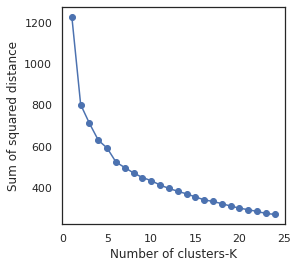

In [308]:
k_list = list(range(1, 25))
inertias = []
for k in k_list:
    kl = KMeans(n_clusters=k)
    kl.fit(a_scaled)
    inertias.append(kl.inertia_)

# Plot see against k
plt.figure(figsize=(4, 4))
plt.plot(k_list, inertias, '-o')
plt.xlabel(r'Number of clusters-K')
plt.ylabel('Sum of squared distance'); 

From above graph we can asume cluster = 8

In [309]:
a_scaled.shape

(4373, 52)

In [310]:
kl = KMeans(n_clusters=8) 
kl.fit(a_scaled)

centroids = kl.cluster_centers_ 

In [311]:
kl.labels_

array([2, 6, 6, ..., 7, 3, 0], dtype=int32)

In [312]:
lab = kl.fit_predict(a_scaled)  
print(lab)

[2 4 4 ... 6 5 0]


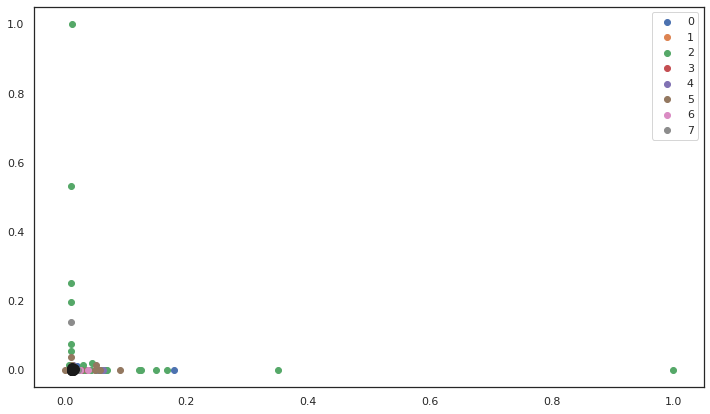

In [317]:
centroids = kl.cluster_centers_
labels = np.unique(lab)
plt.figure(figsize=(12, 7)) 
for i in labels:
    plt.scatter(a_scaled[lab == i , 0] , a_scaled[lab == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, c = 'k')
plt.legend()
plt.show()

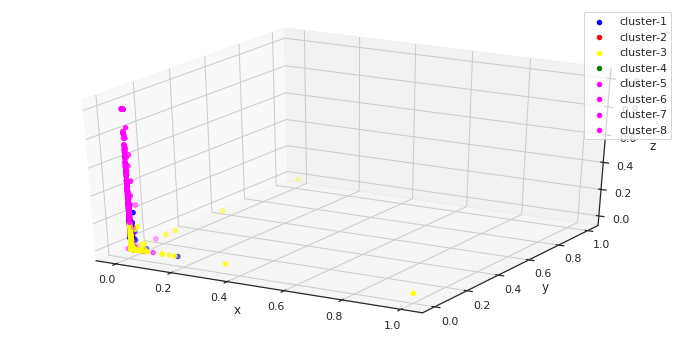

In [318]:
labels = np.unique(lab)
graph = plt.figure(figsize = (12,6))
plot = graph.add_subplot(111, projection='3d')
plot.scatter(a_scaled[lab == 0,0],a_scaled[lab == 0,1],a_scaled[lab == 0,2], s = 20 , color = 'blue', label = "cluster-1")  
plot.scatter(a_scaled[lab == 1,0],a_scaled[lab == 1,1],a_scaled[lab == 1,2], s = 20 , color = 'red', label = "cluster-2")  
plot.scatter(a_scaled[lab == 2,0],a_scaled[lab == 2,1],a_scaled[lab == 2,2], s = 20 , color = 'yellow', label = "cluster-3")  
plot.scatter(a_scaled[lab == 3,0],a_scaled[lab == 3,1],a_scaled[lab == 3,2], s = 20 , color = 'green', label = "cluster-4")  
plot.scatter(a_scaled[lab == 4,0],a_scaled[lab == 4,1],a_scaled[lab == 4,2], s = 20 , color = 'magenta', label = "cluster-5")  
plot.scatter(a_scaled[lab == 5,0],a_scaled[lab == 5,1],a_scaled[lab == 5,2], s = 20 , color = 'magenta', label = "cluster-6")  
plot.scatter(a_scaled[lab == 6,0],a_scaled[lab == 6,1],a_scaled[lab == 6,2], s = 20 , color = 'magenta', label = "cluster-7")  
plot.scatter(a_scaled[lab == 7,0],a_scaled[lab == 7,1],a_scaled[lab == 7,2], s = 20 , color = 'magenta', label = "cluster-8")  
plot.set_xlabel('x')
plot.set_ylabel('y')
plot.set_zlabel('z')
plot.legend()
plt.show()